<a href="https://colab.research.google.com/github/ploydang/emag_acy67/blob/main/66050225_lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ความหนาแน่นประจุ

![](https://github.com/nayot/emag-jupyter/blob/main/pics/cylindrical_charge.png?raw=True)

จงหาประจุทั้งหมดที่บรรจุอยู่ในลำอิเล็กตรอนที่มีความยาว $2~\mathrm{cm}$ ดังแสดงในรูปข้างต้น ถ้าความหนาแน่นประจุเชิงปริมาตร อธิบายได้ด้วย

$$\rho_v=-5\times 10^{-6}e^{-10^5\rho z}~\mathrm{C/m^2}$$

โดยที่เราสามารถหาประจุรวม ที่อยู่ในลำอิเล็กตรอนได้ โดย
$$Q=\int_{0.02}^{0.04}\int_0^{2\pi}\int_0^{0.01} -5\times 10^{-6} e^{-10^5\rho z}\rho \,d\rho d\phi dz$$


In [2]:
import sympy as smp
from scipy.constants import pi

rho, phi, z = smp.symbols('rho phi z', real=True)
f = -5e-6 * smp.exp(-1e5 * rho * z) * rho
smp.integrate(f, [rho, 0, 0.01], [phi, 0, 2], [z, 0.02, 0.04]).evalf()



-2.49999998969423e-14

In [4]:
# ใช้ Sympy
import sympy as smp
from scipy.constants import pi
rho, phi, z = smp.symbols('rho phi z', real=True)
f = -5e-6 * smp.exp(-1e5 * rho * z) * rho
smp.integrate(f, [rho, 0, 0.01], [phi, 0, 2], [z, 0.02, 0.04]).evalf()

-2.49999998969423e-14

In [9]:
# ใช้ Scipy
from scipy.integrate import tplquad
from scipy.constants import pi
from numpy import exp

def funct(rho, phi, z):
    return -5e-6 * exp(-1e5 * rho * z) * rho

tplquad(funct, 0.02, 0.04, 0, 2 * pi, 0, 0.01)[0]


-7.853981601544804e-14

## สนามไฟฟ้าเนื่องจากประจุแบบเส้น

การคำนวณหาสนามไฟฟ้าเนื่องประจุแบบเส้นยาวอนันต์ที่วางอยู่บนแนวแกน $y$ มีความหนาแน่นประจุ $\rho_l~\mathrm{C/m}$ ด้วยวิธี analytical analysis ในระบบพิกัดทรงกระบอก (Cylindrical Coordinate System)

In [10]:
import sympy as smp

rho = smp.symbols('rho', real=True, positive=True)
phi, z = smp.symbols('phi z', real=True)
rho_l, epsilon_0, pi = smp.symbols('rho_l epsilon_0 pi', real=True)

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

### การพล็อตสนามไฟฟ้าเนื่องจากประจุแบบเส้นในระบบพิกัดฉาก
* ด้วยเทคนิคการใช้ตัวแปรเสริม (parameter) $t$ ซึ่งจะช่วยทำให้สามารถคำนวณประจุแบบเส้นที่มีรูปร่างพิเศษ ๆ ได้ เช่น รูปวงกลม
  
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')dr'$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

**ตัวอย่างการใช้ตัวแปรเสริม**
จากสมการวงกลม $$x^2+y^2=1$$
กำหนดให้ $x=\sin(t)$ และ $y=\cos(t)$ ซึ่งสมเหตุสมผลเพราะ $\sin^2(t)+\cos^2(t)=1$ และจะสังเกตได้ว่า $t$ คือ มุมที่รัศมีวงกลมทำกับแกน $x$ นั่นคือ $0\leq t\lt 2\pi$

จงแสดงการพล็อตกราฟรูปวงกลมดังกล่าว

In [21]:
!pip install git+https://github.com/nayot/libemag@main#subdirectory=libemag
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.constants import pi
plt.style.use(['science', 'grid', 'notebook'])

fig = plt.figure(figsize=(6, 6))

def f_c(x):
  return np.sqrt(1-x**2)

y = np.linspace(-1, 1, 100)
x = f_c(x)
plt.plot(x, y)

  Cloning https://github.com/nayot/libemag (to revision main) to /tmp/pip-req-build-8ca722x3
  Running command git clone --filter=blob:none --quiet https://github.com/nayot/libemag /tmp/pip-req-build-8ca722x3
  Resolved https://github.com/nayot/libemag to commit 2fb902418f70ad2dfc3a863f527bf4dad99506b7
  Preparing metadata (setup.py) ... done


OSError: 'science' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

**ตัวอย่าง** จงหาพล็อตสนามไฟฟ้าเนื่องจากประจุแบบเส้นที่มีความหนาแน่นประจุ $1~\mu\mathrm{C/m}$ วางอยู่บนแกน y และมีความยาว $10~\mathrm{m}$

  Cloning https://github.com/nayot/libemag (to revision main) to /tmp/pip-req-build-5_rxc1xf
  Running command git clone --filter=blob:none --quiet https://github.com/nayot/libemag /tmp/pip-req-build-5_rxc1xf
  Resolved https://github.com/nayot/libemag to commit 2fb902418f70ad2dfc3a863f527bf4dad99506b7
  Preparing metadata (setup.py) ... done


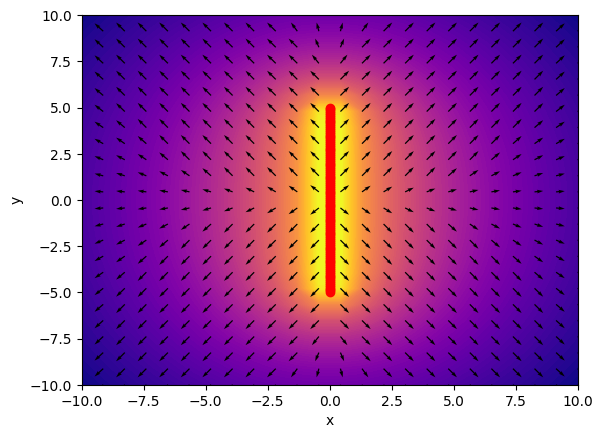

In [23]:
# หาสนามไฟฟ้า E
!pip install git+https://github.com/nayot/libemag@main#subdirectory=libemag
import sympy as smp
import numpy as np
from libemag.plots import field_plot
from scipy.constants import pi, epsilon_0
from scipy.integrate import quad
import matplotlib.pyplot as plt

# YOUR CODE HERE
rho_l = 1e-6
x, y, t = smp.symbols('x y t', real=True)

r = smp.Matrix([x,y])
rp = smp.Matrix([0, t])
R = r - rp

drpdt = smp.diff(rp, t)
dqdt = rho_l * drpdt.norm()

dEdt = dqdt / (4 * pi * epsilon_0) * R / R.norm()**3

dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

def E(x,y):
  Ex = quad(dExdt, -5, 5, args=(x,y))[0]
  Ey = quad(dEydt, -5, 5, args=(x,y))[0]
  return np.array([Ex, Ey])

field_plot(E, contour=True, num_grids=24)

yv = np.linspace(-5, 5, 100)
xv = np.zeros(len(yv))
plt.scatter(xv, yv, color='r')

## Activity 1
จงปรับปรุง code ตัวอย่างข้างต้นเพื่อพล็อตสนามไฟฟ้าเนื่องจากประจุแบบเส้นตัวดังกล่าว โดยให้พล็อตเฉพาะขอบเขต $-10\leq x \leq 10$ และ $-1\leq y\leq 1$

  Cloning https://github.com/nayot/libemag (to revision main) to /tmp/pip-req-build-5lpi5fs0
  Running command git clone --filter=blob:none --quiet https://github.com/nayot/libemag /tmp/pip-req-build-5lpi5fs0
  Resolved https://github.com/nayot/libemag to commit 2fb902418f70ad2dfc3a863f527bf4dad99506b7
  Preparing metadata (setup.py) ... done


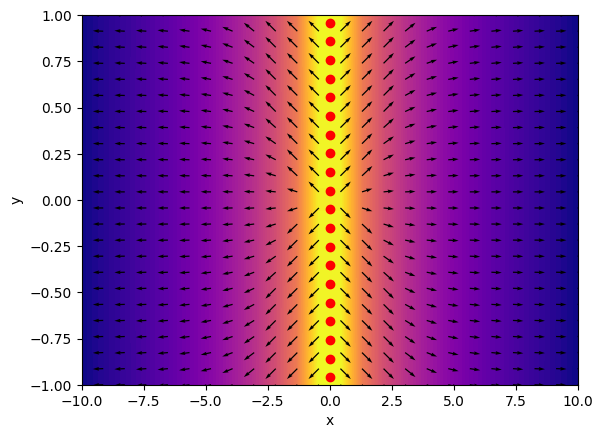

In [24]:
# หาสนามไฟฟ้า E
!pip install git+https://github.com/nayot/libemag@main#subdirectory=libemag
import sympy as smp
import numpy as np
from libemag.plots import field_plot
from scipy.constants import pi, epsilon_0
from scipy.integrate import quad
import matplotlib.pyplot as plt

# YOUR CODE HERE
rho_l = 1e-6
x, y, t = smp.symbols('x y t', real=True)

r = smp.Matrix([x,y])
rp = smp.Matrix([0, t])
R = r - rp

drpdt = smp.diff(rp, t)
dqdt = rho_l * drpdt.norm()

dEdt = dqdt / (4 * pi * epsilon_0) * R / R.norm()**3

dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

def E(x,y):
  Ex = quad(dExdt, -10, 10, args=(x,y))[0]
  Ey = quad(dEydt, -1, 1, args=(x,y))[0]
  return np.array([Ex, Ey])

field_plot(E, contour=True, num_grids=24, x_min=-10, x_max=10, y_min=-1, y_max=1)

yv = np.linspace(-5, 5, 100)
xv = np.zeros(len(yv))
plt.scatter(xv, yv, color='r')

In [ ]:
# Testing -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert plot_ans()

## Activity 2
จงเขียน code เพื่อพล็อตสนามไฟฟ้าเนื่องจากประจุแบบวงแหวนที่มีรัศมี $5~\mathrm{cm}$ ที่มีความหนาแน่นประจุ $\rho_l=5~\mathrm{nC/m}$

In [29]:
!pip install git+https://github.com/nayot/libemag@main#subdirectory=libemag
import sympy as smp
import numpy as np
from libemag.plots import field_plot
from scipy.constants import pi, epsilon_0
from scipy.integrate import quad
import matplotlib.pyplot as plt

def plot_ring():
    a = 0.05
    t = smp.symbols('t', real=True, positive=True)
    x, y = smp.symbols('x y', real=True)

    r = smp.Matrix([x,y])
    rp = smp.Matrix([a * smp.cos(t), a * smp.sin(t)])
    R = r - rp

    rho_l = 5e-9
    drpdt = smp.diff(rp, t)
    dqdt = rho_l * drpdt.norm()

    dEdt = dqdt / (4 * pi * epsilon_0) * R / R.norm()**3

    dExdt = smp.lambdify([t, x, y], dEdt[0])
    dEydt = smp.lambdify([t, x, y], dEdt[1])

    def E(x,y):
        Ex = quad(dExdt, 0, 2 * pi, args=(x,y))[0]
        Ey = quad(dEydt, 0, 2 * pi, args=(x,y))[0]
        return np.array([Ex, Ey])
    plt.figure(figsize=(8, 8))
    plot_r = 10e-2
    field_plot(E, contour=True, x_min=-plot_r, x_max=plot_r, y_min=-plot_r, y_max=plot_r, num_grids=30)

    tv = np.linspace(0, 2 * pi, 300)
    xv = a * np.cos(tv)
    yv = a * np.sin(tv)
    plt.scatter(xv, yv, color='r', s=10)

    return True


  Cloning https://github.com/nayot/libemag (to revision main) to /tmp/pip-req-build-h8u_uxi_
  Running command git clone --filter=blob:none --quiet https://github.com/nayot/libemag /tmp/pip-req-build-h8u_uxi_
  Resolved https://github.com/nayot/libemag to commit 2fb902418f70ad2dfc3a863f527bf4dad99506b7
  Preparing metadata (setup.py) ... done


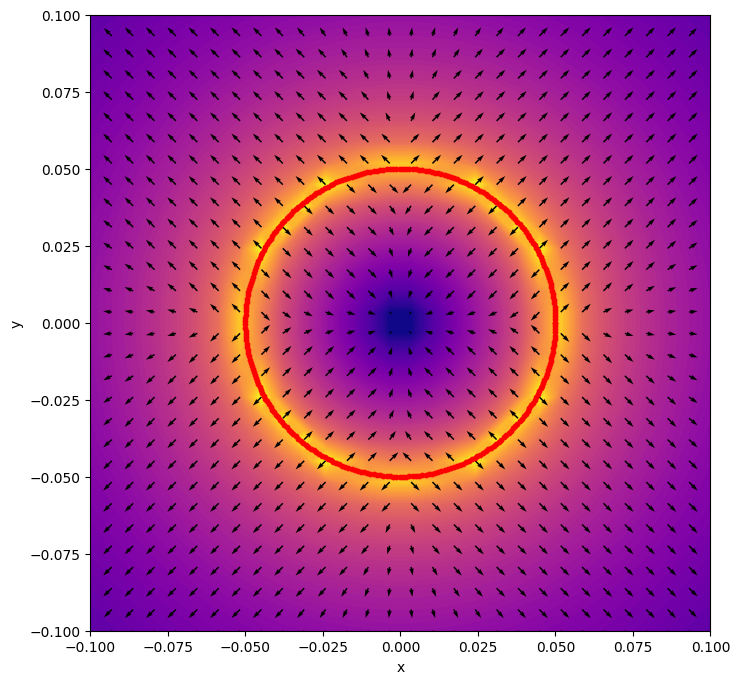

In [30]:
assert plot_ring()